# **Activity 1**

<h3>Installing Kaggle to access the files

In [1]:
! pip install Kaggle

  Using cached kaggle-1.6.17-py3-none-any.whl
  Using cached certifi-2024.12.14-py3-none-any.whl.metadata (2.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached charset_normalizer-3.4.0-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached certifi-2024.12.14-py3-none-any.whl (164 kB)
Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached urllib3-2.2.3-py3-none-any.wh

In [4]:
! kaggle datasets files soumikrakshit/dark-face-dataset

Next Page Token = CfDJ8L3o_FPsMQlKvPRAcaVvXWPeDg5Hk7wQ5-gFgOr0JHbajogPQSI0lBPseaJ-DjklXNq87Ctwhd80YM8yaM-7mmU
name              size  creationDate         
--------------  ------  -------------------  
image/1.png      730KB  2022-05-20 18:39:13  
image/10.png     620KB  2022-05-20 18:39:13  
image/100.png    616KB  2022-05-20 18:39:13  
image/1000.png   529KB  2022-05-20 18:39:13  
image/1001.png   952KB  2022-05-20 18:39:14  
image/1002.png   973KB  2022-05-20 18:39:14  
image/1003.png   472KB  2022-05-20 18:39:14  
image/1004.png   445KB  2022-05-20 18:39:14  
image/1005.png   635KB  2022-05-20 18:39:14  
image/1006.png   713KB  2022-05-20 18:39:14  
image/1007.png   481KB  2022-05-20 18:39:14  
image/1008.png   679KB  2022-05-20 18:39:14  
image/1009.png   616KB  2022-05-20 18:39:14  
image/101.png    648KB  2022-05-20 18:39:14  
image/1010.png   938KB  2022-05-20 18:39:14  
image/1011.png   702KB  2022-05-20 18:39:14  
image/1012.png   676KB  2022-05-20 18:39:14  
image/1013.png  

<h3>Downloading selected files</h3>

In [8]:
! kaggle datasets download soumikrakshit/dark-face-dataset -f image/1.png
! kaggle datasets download soumikrakshit/dark-face-dataset -f image/1004.png
! kaggle datasets download soumikrakshit/dark-face-dataset -f image/1017.png
! kaggle datasets download soumikrakshit/dark-face-dataset -f image/1015.png

Dataset URL: https://www.kaggle.com/datasets/soumikrakshit/dark-face-dataset
License(s): unknown
1.png: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/soumikrakshit/dark-face-dataset
License(s): unknown
1004.png: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/soumikrakshit/dark-face-dataset
License(s): unknown
1017.png: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/soumikrakshit/dark-face-dataset
License(s): unknown




  0%|          | 0.00/747k [00:00<?, ?B/s]
100%|██████████| 747k/747k [00:00<00:00, 2.00MB/s]
100%|██████████| 747k/747k [00:00<00:00, 1.99MB/s]


<h3>Import neccesary libraries

In [213]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

#### **Display Image**

In [22]:
def display_image(title, image):
    plt.figure(figsize= (8, 8))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

#### **Display Histogram**

In [192]:
def display_histogram(title, image):
    plt.figure(figsize=(8,4))
    plt.title(f'Histogram of {title}')
    plt.hist(image.ravel(), bins=256, range=(0,256), color='blue', alpha=0.7)
    plt.show

#### **Metrics Calculations**

In [214]:
def calculate_metrics(original_image, processed_image):
    psnr = cv2.PSNR(original_image, processed_image)
    ssim = skimage.metrics.structural_similarity(original_image, processed_image)

    return psnr, ssim

#### **Load Image**

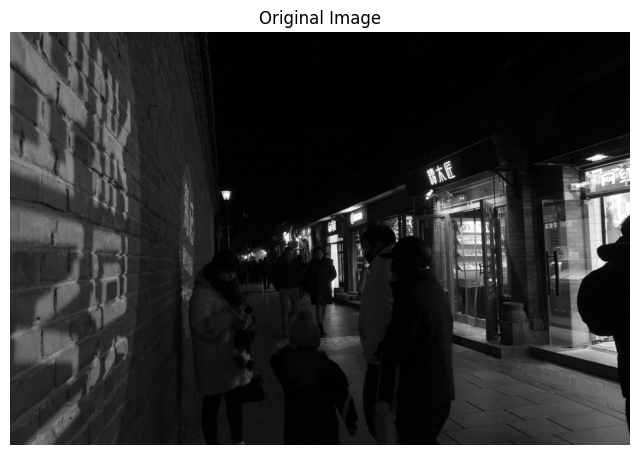

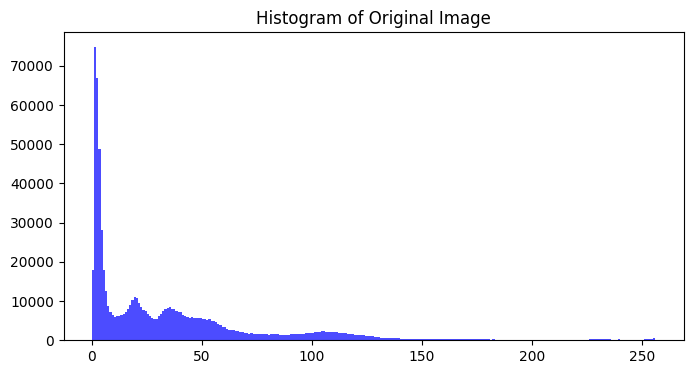

In [281]:
original_image = cv2.imread('images/1017.png', cv2.IMREAD_GRAYSCALE)
display_image('Original Image', original_image)
display_histogram('Original Image', original_image)

#### **Image Stacking**

In [282]:
def image_stacking(image, iterations):
    summed = image.astype(np.float32)
    for _ in range(iterations):
        summed += image.astype(np.float32)
    #Normalizing values to keep the range
    summed = np.clip(summed, 0, 255).astype(np.uint8)
    return summed

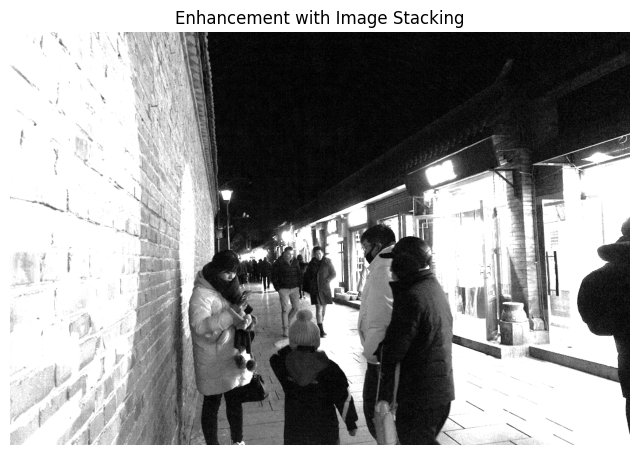

PSNR: 6.264562403401648
SSIM: 0.22516080749374018


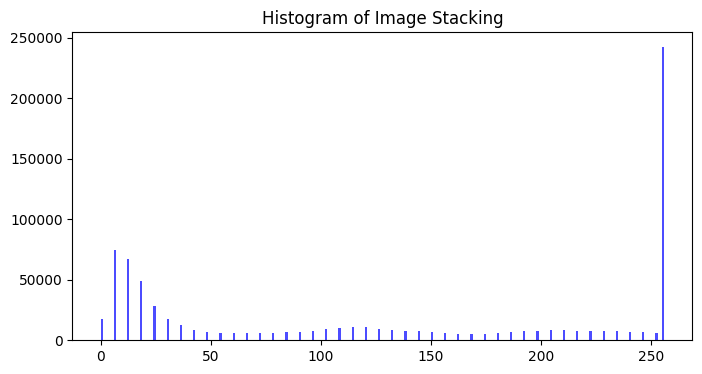

In [283]:
summed_image = image_stacking(original_image, 5)
display_image('Enhancement with Image Stacking', summed_image)
display_histogram('Image Stacking', summed_image)
psnr, ssim = calculate_metrics(original_image, summed_image)
print(f'PSNR: {psnr}')
print(f'SSIM: {ssim}')

#### **Histogram Equalization**

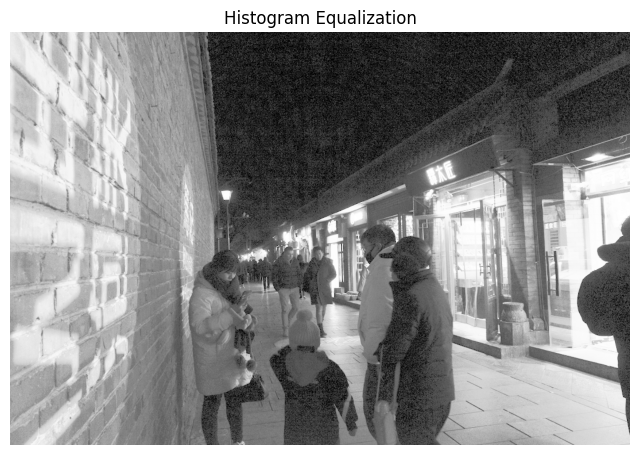

PSNR: 8.12249834381891
SSIM: 0.28437011682664964


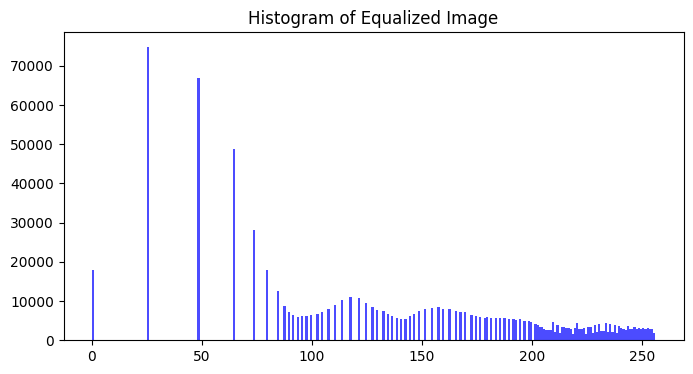

In [284]:
equalized_image = cv2.equalizeHist(original_image)
display_image('Histogram Equalization' , equalized_image)
display_histogram('Equalized Image', equalized_image)
psnr, ssim = calculate_metrics(original_image, equalized_image)
print(f'PSNR: {psnr}')
print(f'SSIM: {ssim}')

#### **Intensity Adjusment**

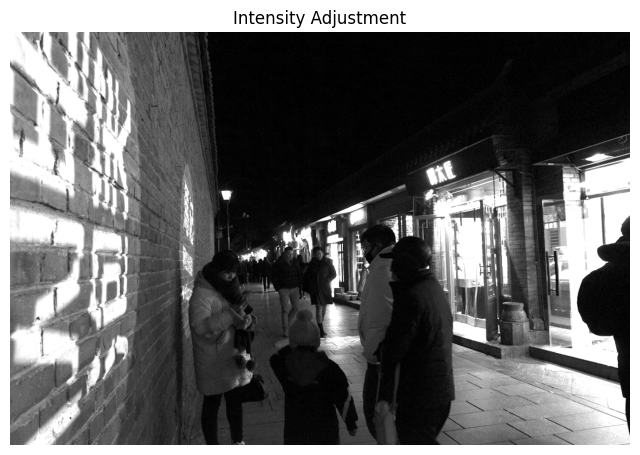

PSNR: 11.848408010804716
SSIM: 0.6065873030767841


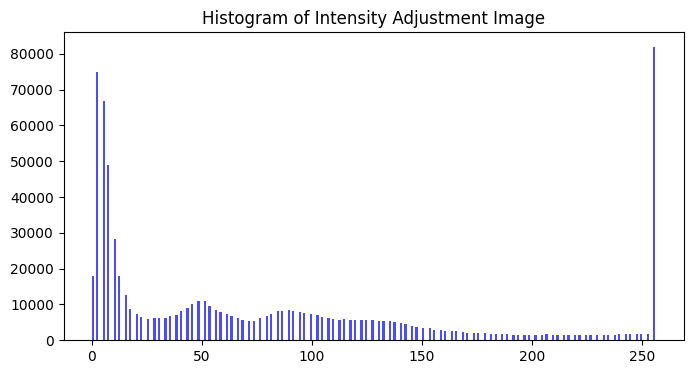

In [285]:
adjusted_image = skimage.exposure.rescale_intensity(original_image, in_range = (0, 100), out_range= (0, 255)).astype(np.uint8)
display_image('Intensity Adjustment', adjusted_image)
display_histogram('Intensity Adjustment Image', adjusted_image)
psnr, ssim = calculate_metrics(original_image, adjusted_image)
print(f'PSNR: {psnr}')
print(f'SSIM: {ssim}')

#### **Applying Arithmetic Op**

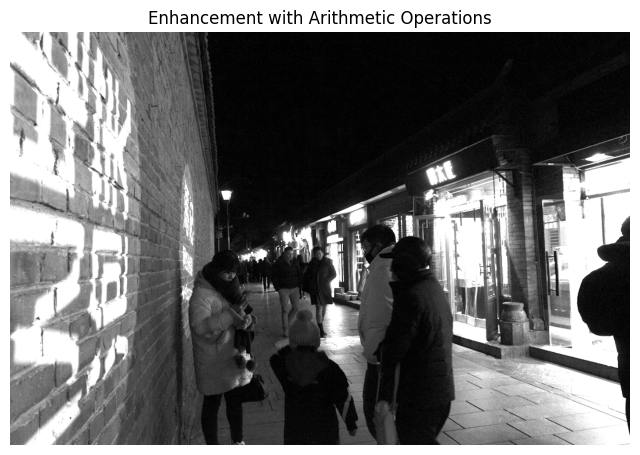

PSNR: 10.485102682796485
SSIM: 0.5014438791668001


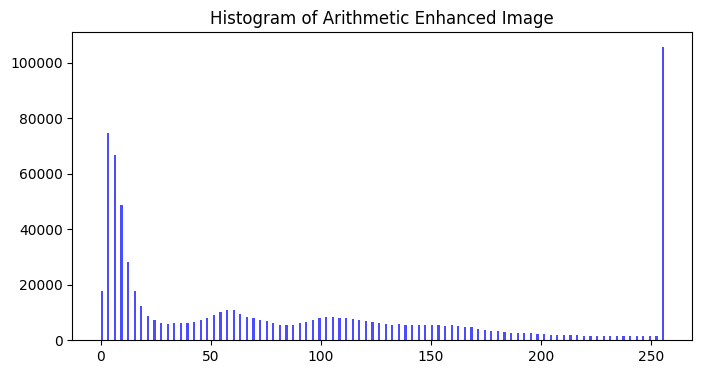

In [286]:
enhanced_image = cv2.multiply(original_image, 3)
enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)
display_image('Enhancement with Arithmetic Operations' , enhanced_image)
display_histogram('Arithmetic Enhanced Image', enhanced_image)

psnr, ssim = calculate_metrics(original_image, enhanced_image)
print(f'PSNR: {psnr}')
print(f'SSIM: {ssim}')

#### **Logaritmic Enhancement**

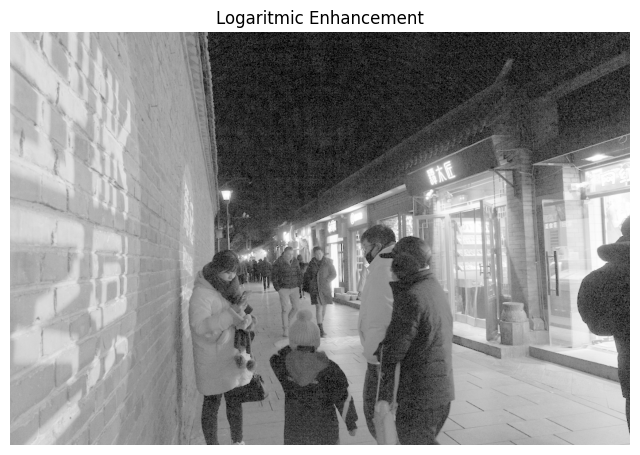

PSNR: 8.094160776203406
SSIM: 0.2972163151959135


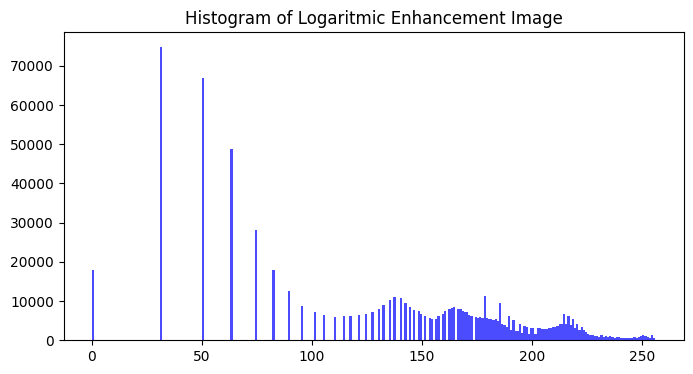

In [287]:
img_float = np.float32(original_image)
c = 255 / np.log(1+np.max(img_float))
log_image = c*np.log(1+img_float)
log_image = np.clip(log_image, 0, 255).astype(np.uint8)
display_image('Logaritmic Enhancement', log_image)
display_histogram('Logaritmic Enhancement Image', log_image)
psnr, ssim = calculate_metrics(original_image, log_image)
print(f'PSNR: {psnr}')
print(f'SSIM: {ssim}')

### **Image Comparison**

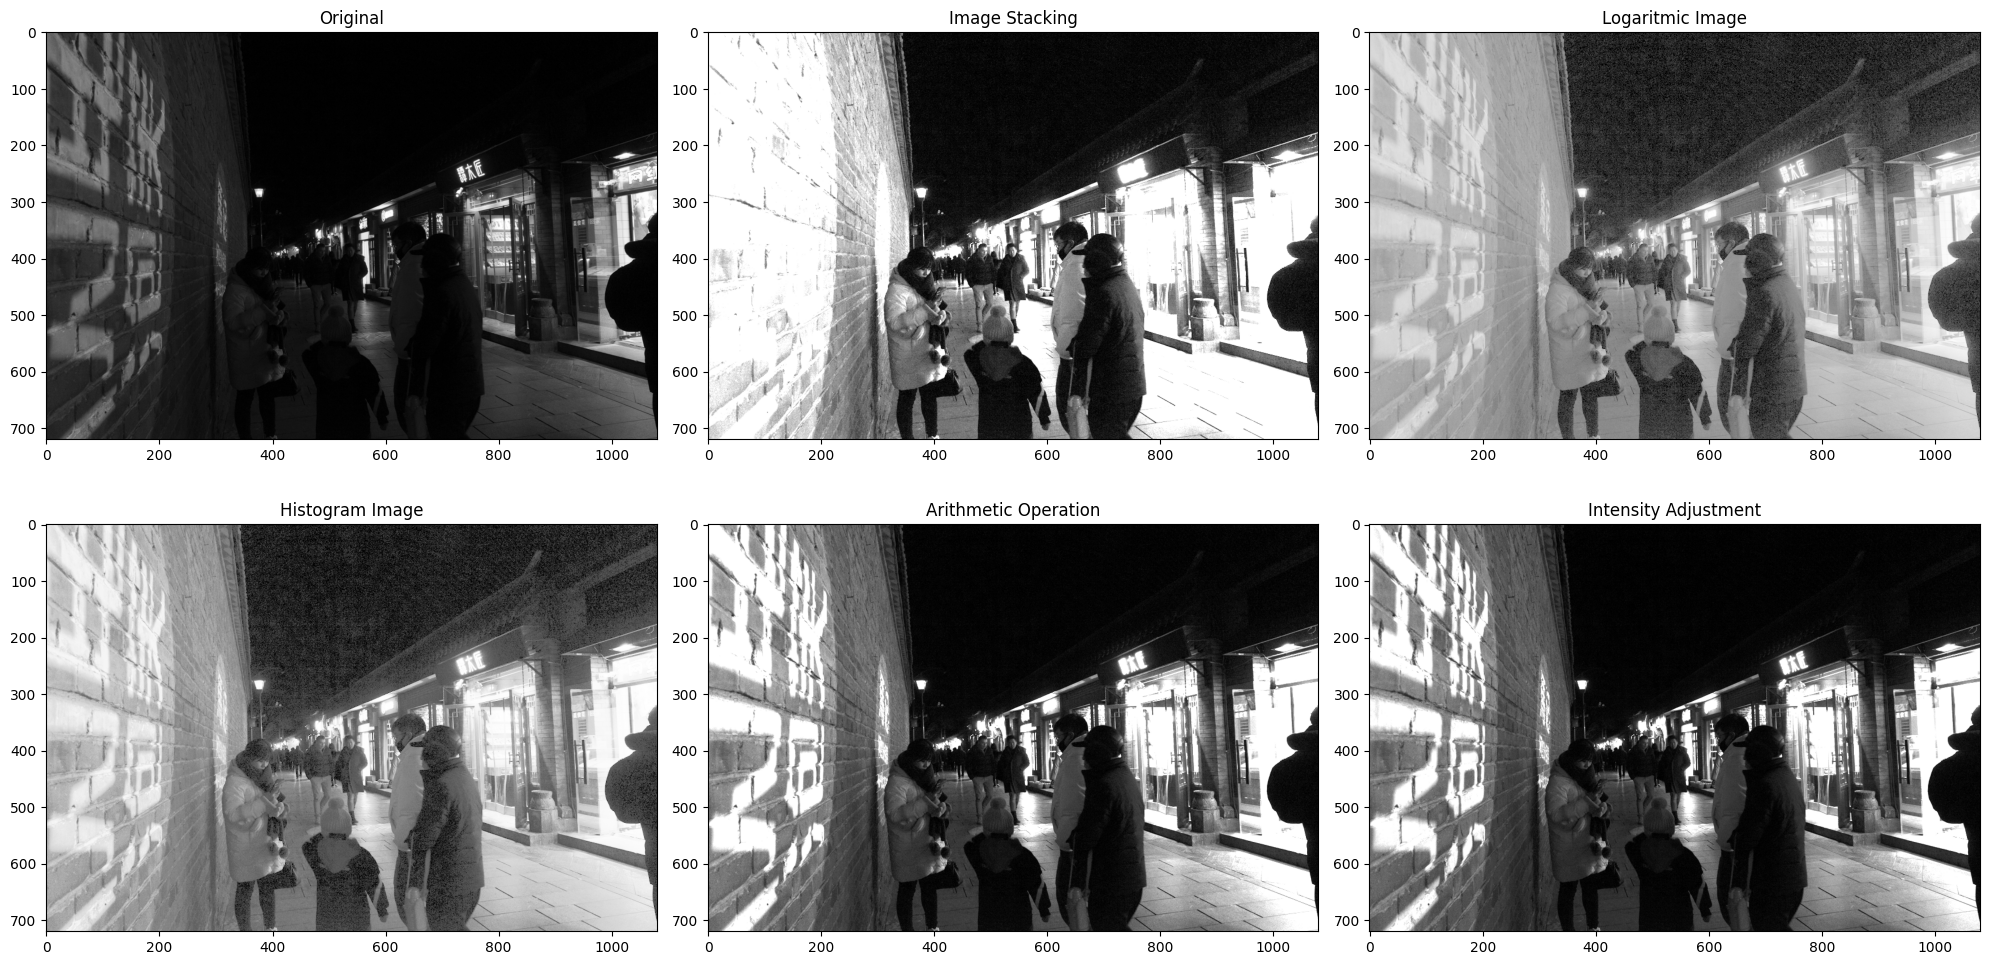

In [288]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))
axs[0,0].imshow(original_image, cmap = 'gray')
axs[0,0].set_title('Original')
axs[0,1].imshow(summed_image, cmap = 'gray')
axs[0,1].set_title('Image Stacking')
axs[1,0].imshow(equalized_image, cmap = 'gray')
axs[1,0].set_title('Histogram Image')
axs[1,1].imshow(enhanced_image, cmap = 'gray')
axs[1,1].set_title('Arithmetic Operation')
axs[0,2].imshow(log_image, cmap = 'gray')
axs[0,2].set_title('Logaritmic Image')
axs[1,2].imshow(adjusted_image, cmap = 'gray')
axs[1,2].set_title('Intensity Adjustment')

plt.tight_layout()
plt.show()

#### **Histogram Comparison**

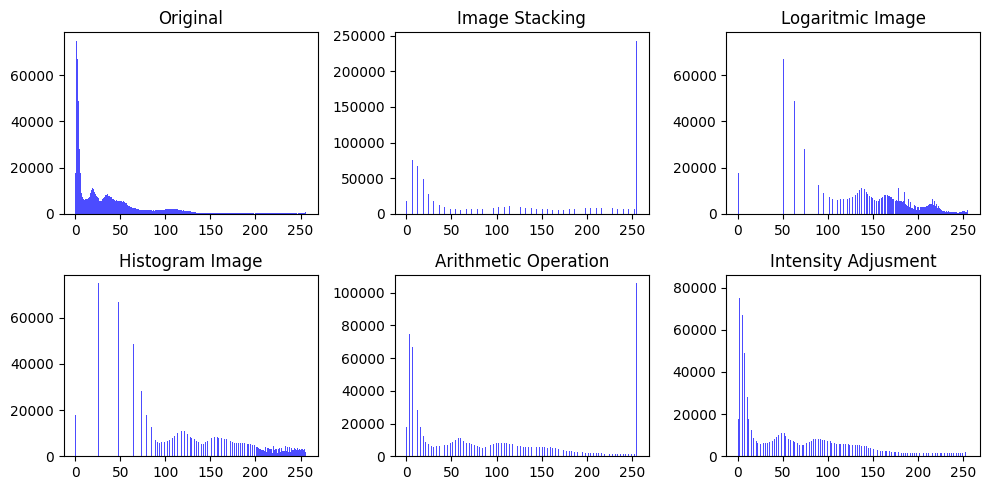

In [289]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
axs[0,0].hist(original_image.ravel(), bins = 256, range=(0,256), color = 'blue', alpha = 0.7)
axs[0,0].set_title('Original')
axs[0,1].hist(summed_image.ravel(), bins = 256, range=(0,256), color = 'blue', alpha = 0.7)
axs[0,1].set_title('Image Stacking')
axs[1,0].hist(equalized_image.ravel(), bins = 256, range=(0,256), color = 'blue', alpha = 0.7)
axs[1,0].set_title('Histogram Image')
axs[1,1].hist(enhanced_image.ravel(), bins = 256, range=(0,256), color = 'blue', alpha = 0.7)
axs[1,1].set_title('Arithmetic Operation')
axs[0,2].hist(log_image.ravel(), bins = 256, range=(0,256), color = 'blue', alpha = 0.7)
axs[0,2].set_title('Logaritmic Image')
axs[1,2].hist(adjusted_image.ravel(), bins = 256, range=(0,256), color = 'blue', alpha = 0.7)
axs[1,2].set_title('Intensity Adjusment')

plt.tight_layout()
plt.show()